In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
sns.set()

In [5]:
data = pd.read_csv("Mall_Customers.csv")
df = data.copy()
df = df.drop("CustomerID",axis = 1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# EDA

### Burada her bir değişkenin histogram grafiğiyle dağılımını gözlemlemekteyiz.

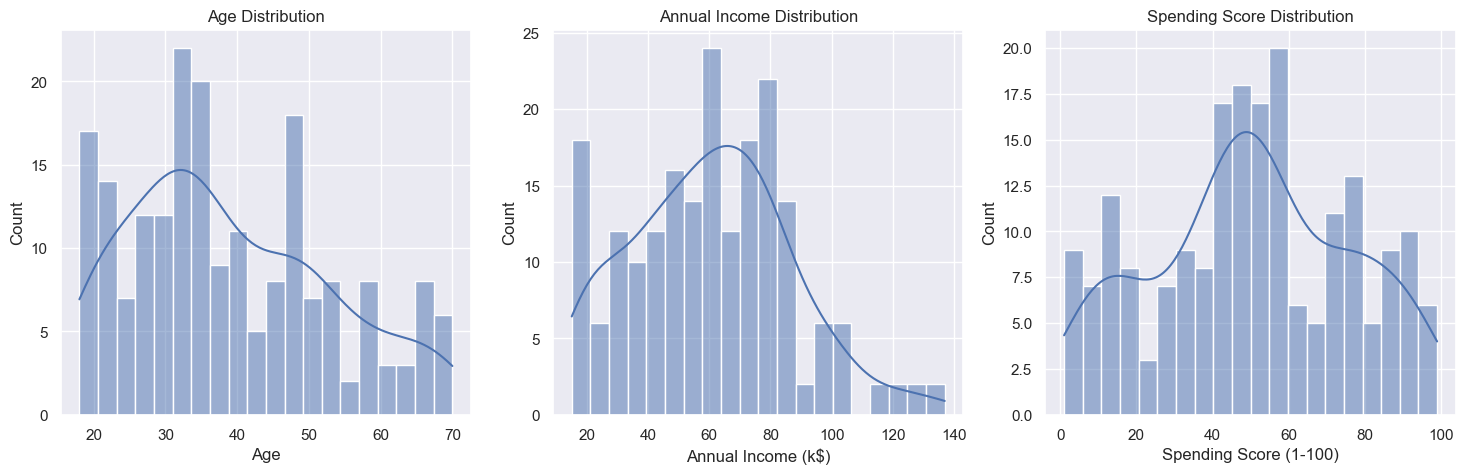

In [8]:

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Age'], bins=20, kde=True, ax=axs[0])
axs[0].set_title('Age Distribution')

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, ax=axs[1])
axs[1].set_title('Annual Income Distribution')

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, ax=axs[2])
axs[2].set_title('Spending Score Distribution')

plt.show()

### Değişkenler arası ilişkileri incelemek amacıyla scatter plot yapıyoruz.

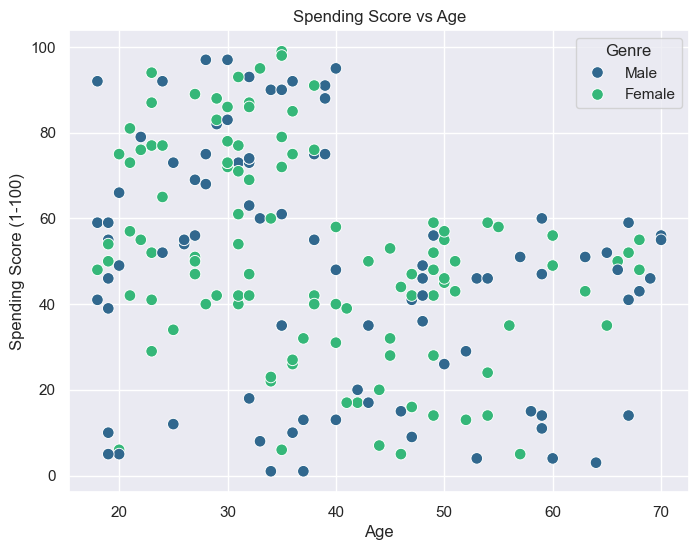

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Genre', palette='viridis', s=70)
plt.title('Spending Score vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

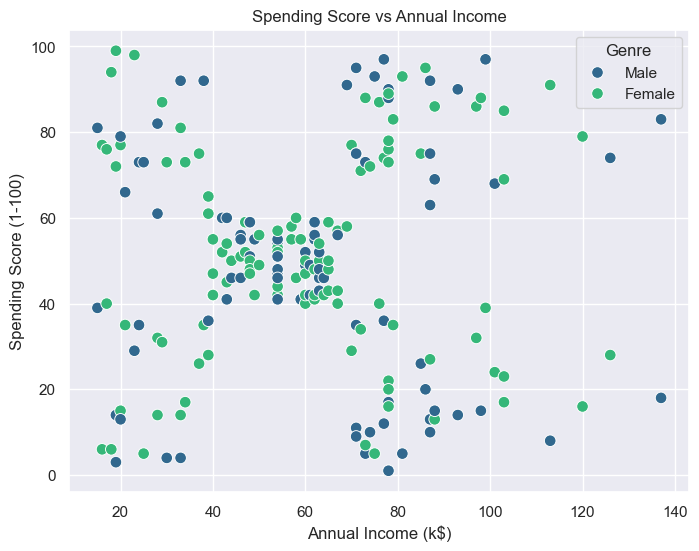

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', palette='viridis', s=70)
plt.title('Spending Score vs Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

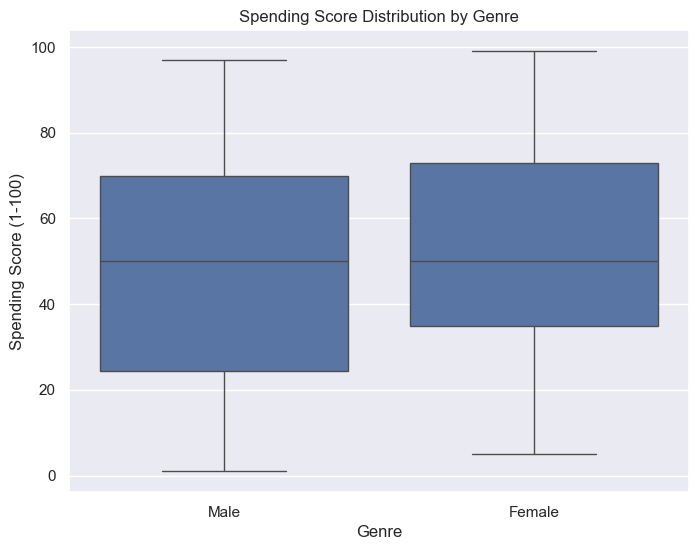

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Genre', y='Spending Score (1-100)')
plt.title('Spending Score Distribution by Genre')
plt.show()

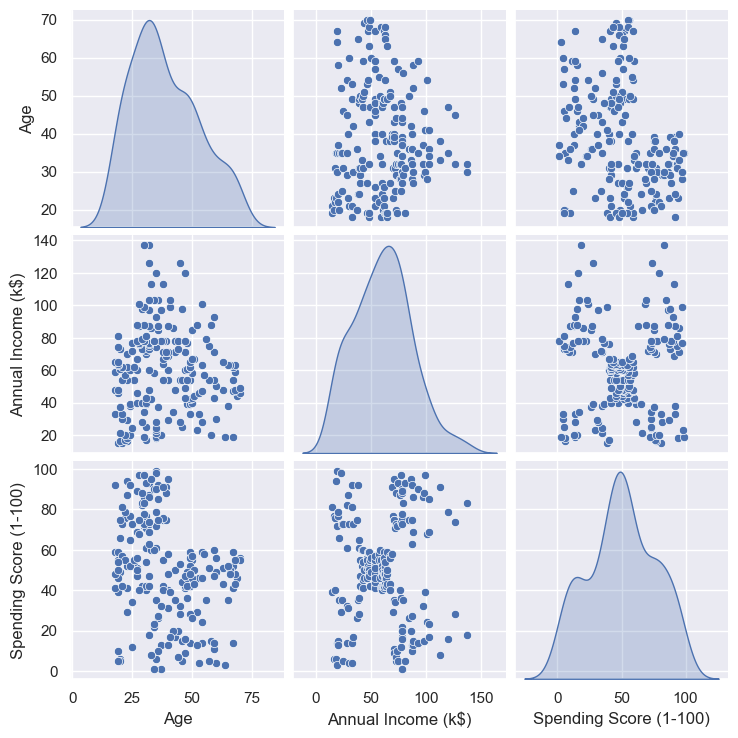

In [12]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.show()

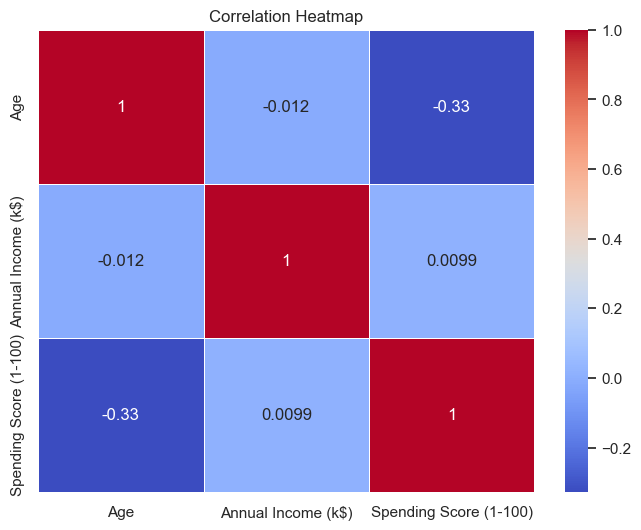

In [13]:
plt.figure(figsize=(8, 6))
correlation = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Standartlaştırma

In [14]:
from sklearn.preprocessing import StandardScaler
X = df.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Medoids Algoritması

In [15]:
from pyclustering.cluster.kmedoids import kmedoids

In [16]:
from sklearn.metrics import pairwise_distances

In [18]:
diss = pairwise_distances(X_scaled, metric="euclidean")

initial_medoids = [0, 50, 100]

kmed = kmedoids(diss, initial_medoids, data_type='distance_matrix')
kmed.process()

clusters = kmed.get_clusters()
medoids = kmed.get_medoids()

In [19]:
labels = np.zeros(len(df))

for i, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = i

df["Cluster"] = labels.astype(int)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


### Algoritma kuruldu.

In [ ]:
# Tanımlayıcı istatistikler

In [21]:
df.groupby("Cluster").mean(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.675000,87.800000,80.525000
1,51.032258,61.526882,34.430108
2,25.626866,42.955224,53.985075


In [22]:
cluster_counts = df["Cluster"].value_counts().sort_index()
cluster_counts

Cluster
0    40
1    93
2    67
Name: count, dtype: int64

In [23]:
cluster_means = df.groupby("Cluster").mean(numeric_only=True)
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.675000,87.800000,80.525000
1,51.032258,61.526882,34.430108
2,25.626866,42.955224,53.985075


In [24]:
cluster_std = df.groupby("Cluster").std(numeric_only=True)
cluster_std

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,3.682164,17.970346,13.720633
1,9.878008,23.097897,17.664382
2,5.882269,19.488484,23.284468


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# df zaten elinde var, Cluster sütunu da hazır
# numerik değişkenleri seçelim
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(num_cols)


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


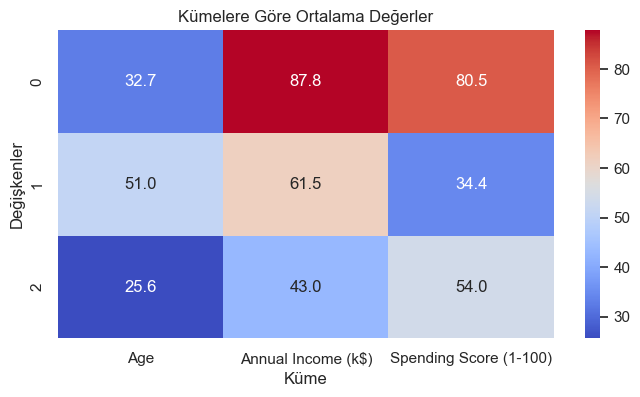

In [25]:
plt.figure(figsize=(8,4))
sns.heatmap(cluster_means, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Kümelere Göre Ortalama Değerler")
plt.ylabel("Değişkenler")
plt.xlabel("Küme")
plt.show()

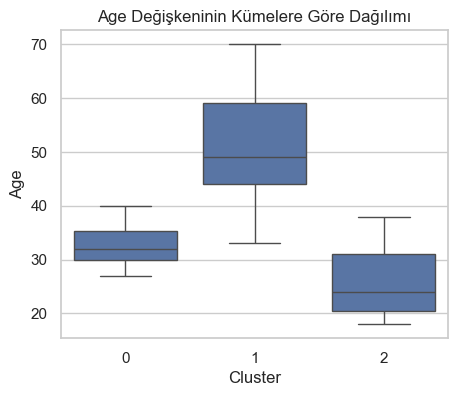

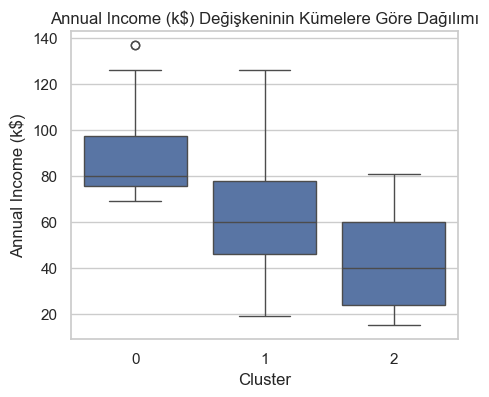

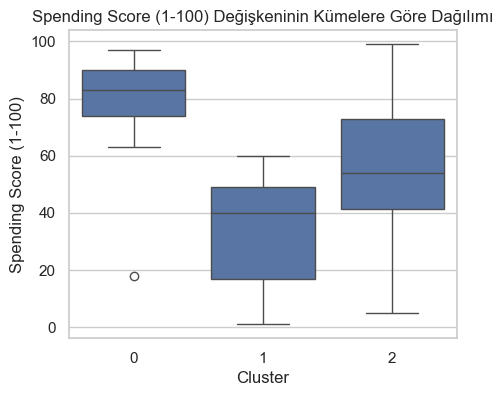

In [28]:
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x="Cluster", y=col, data=df)
    plt.title(f"{col} Değişkeninin Kümelere Göre Dağılımı")
    plt.show()

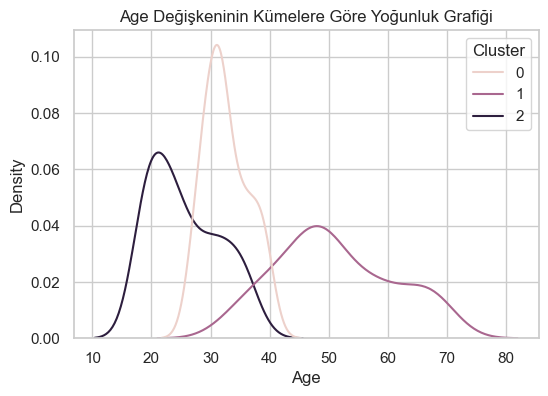

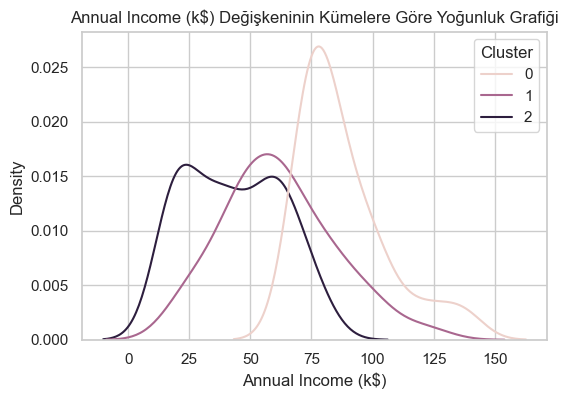

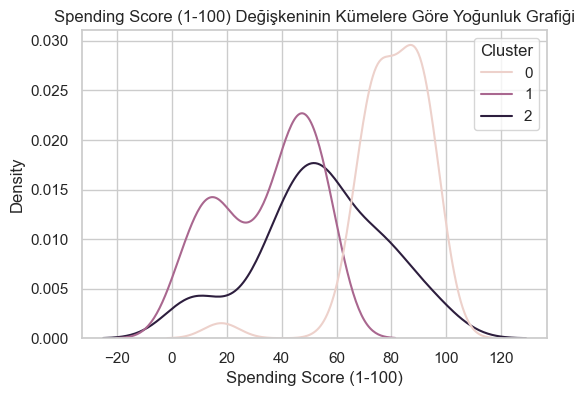

In [30]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df, x=col, hue="Cluster", common_norm=False)
    plt.title(f"{col} Değişkeninin Kümelere Göre Yoğunluk Grafiği")
    plt.show()

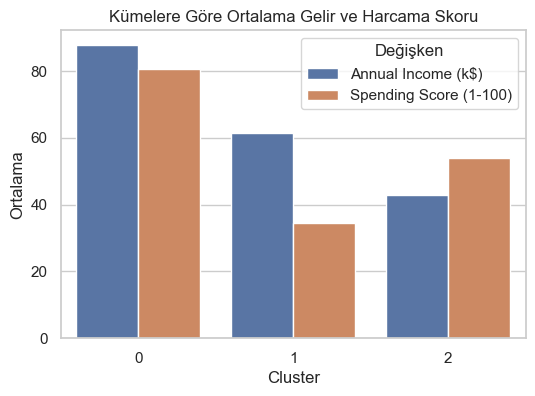

In [33]:
melted = cluster_means_sel.melt(id_vars="Cluster", var_name="Değişken", value_name="Ortalama")

plt.figure(figsize=(6,4))
sns.barplot(data=melted, x="Cluster", y="Ortalama", hue="Değişken")
plt.title("Kümelere Göre Ortalama Gelir ve Harcama Skoru")
plt.show()

# K-Means K-Medoid Karşılaştırması

In [34]:
df.rename(columns={"Cluster": "Cluster_kmedoids"}, inplace=True)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
X = df[num_cols].values

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

df["Cluster_kmeans"] = kmeans.labels_


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [39]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(X_scaled, df["Cluster_kmeans"])
sil_kmed = silhouette_score(X_scaled, df["Cluster_kmedoids"])

print("K-Means Silhouette Skoru:", sil_kmeans)
print("K-Medoids Silhouette Skoru:", sil_kmed)


K-Means Silhouette Skoru: 0.357793388710272
K-Medoids Silhouette Skoru: 0.3593085939404446


In [41]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "KMeans": df["Cluster_kmeans"],
    "KMedoids": df["Cluster_kmedoids"]
})


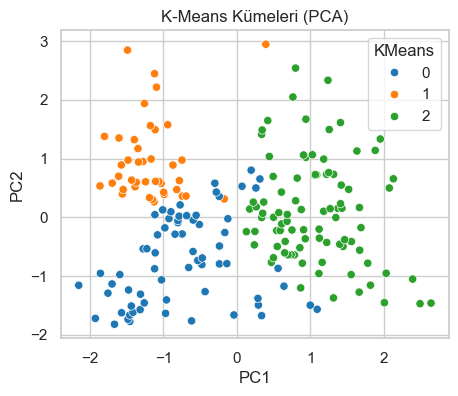

In [42]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="KMeans", palette="tab10")
plt.title("K-Means Kümeleri (PCA)")
plt.show()


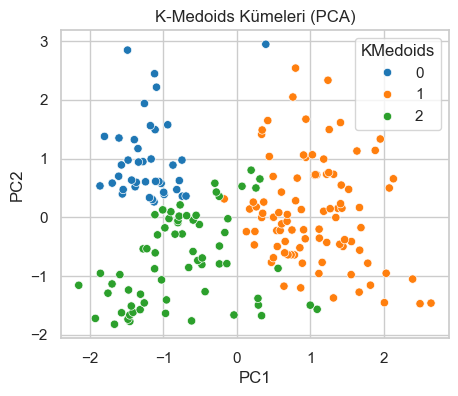

In [43]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="KMedoids", palette="tab10")
plt.title("K-Medoids Kümeleri (PCA)")
plt.show()


“Her iki algoritma da benzer bölgelerde kümeler oluşturmakla birlikte,
bazı gözlemler farklı kümelere atanmıştır. K-Medoids, medoid seçimi nedeniyle
özellikle aykırı gözlemlere karşı daha dayanıklı kümeler oluşturur.”

Bu çalışmada K-Means ve K-Medoids algoritmaları 3 küme için uygulanmış, sonuçlar karşılaştırılmıştır.
Silhouette skorlarına göre (çıkan değere göre sen ekle), K-Medoids algoritması daha dayanıklı ve daha iyi ayrışmış kümeler üretmiştir.
K-Means ise hesaplama açıdan daha hızlı olmakla birlikte, ortalama merkez kullanması nedeniyle aykırı gözlemlerden etkilenmiş, bazı noktaları farklı kümelere atamıştır.
K-Medoids’in medoid noktaları gerçek gözlemler olduğundan müşteri profillerini yorumlamak daha kolay olmuş, her küme somut bir müşteri tipiyle temsil edilmiştir.
Sonuç olarak bu veri setinde (hangi skor daha iyiyse onu yaz) yöntemi daha uygun görünmektedir.